# How to plot a signal in its genomic context  ? 

In [1]:
# Path indication to the GRATIOSA package
import sys
sys.path.insert(0, '/home/maiwenn/these/topo_database/') 

# Loading the modules for data loading
from GRATIOSA import Genome, Chipseq

# Loading the graphical module
from GRATIOSA import plot_genome

## 1 - Data loading
#### Genomic annotation loading

In [2]:
g = Genome.Genome("ecoli_W3110_Mu")
g.load_annotation()

Trying to load annotation from: /home/maiwenn/these/data/ecoli_W3110_Mu/annotation/sequence.gff3
Annotation loaded


#### ChipSeq signal loading

In [3]:
# Initialization of the Chipseq object
ch = Chipseq.Chipseq("ecoli_W3110_Mu")

# Selection of replicates for each signal type
cond = {"Topo": ["Sutormin_shift_TopoI_R1", "Sutormin_shift_TopoI_R2", "Sutormin_shift_TopoI_R3"],
        "Gyr": ["Sutormin_shift_Gyrase_R1", "Sutormin_shift_Gyrase_R2"]}  

# The load_signal_average method performs the following two steps:
# 1 - Processes each replicate (here, smoothing with a chosen window size)
# 2 - Calculates the average signal between replicates for each genomic position
smooth_window = 100  # Choice of the window size (in b) for smoothing
for styp in cond.keys():
    ch.load_signals_average(list_cond=cond[styp],
                            average_name=f"{styp}_smooth{smooth_window}b",
                            data_treatment="smoothing",
                            window=smooth_window)

loading the file obtained with the following parameters:

Name: Topo_smooth100b

 Replicates: ['Sutormin_shift_TopoI_R1', 'Sutormin_shift_TopoI_R2', 'Sutormin_shift_TopoI_R3']

 Data treatment: smoothing

 Size (window or bin, in b): 100

Please change 'average_name' to use other signals
loading the file obtained with the following parameters:

Name: Gyr_smooth100b

 Replicates: ['Sutormin_shift_Gyrase_R1', 'Sutormin_shift_Gyrase_R2']

 Data treatment: smoothing

 Size (window or bin, in b): 100

Please change 'average_name' to use other signals


## 2 - Genomic plot 

Saved as /home/maiwenn/these/resdir/Genome_plot/genomic_plot_TopoI_Gyrase.pdf


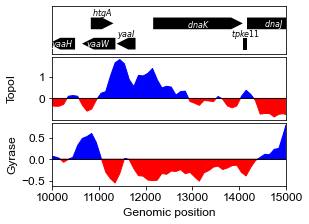

In [4]:
plot_genome.plot_region(g,beg=10000,end = 15000,
                        signals_cond=[f"Topo_smooth{smooth_window}b",f"Gyr_smooth{smooth_window}b"],
                        gene_names = True, 
                        hratios = [1.5,2,2],
                        S_ylabels=['TopoI','Gyrase'],
                        hspace=0.05,
                        figsize=(5,3),
                        output_file=f"genomic_plot_TopoI_Gyrase",
                        file_extension='.pdf',
                        ch_object=ch
                       )

See the function description for arguments selection.

In [5]:
help(plot_genome.plot_region)

Help on function plot_region in module GRATIOSA.plot_genome:

plot_region(gen, beg, end, RNASeq_cond=[], signals_cond=[], gene_names=True, output_dir='/home/maiwenn/these/resdir/Genome_plot/', output_file='Genome_2023-09-14 16:32:03.490386', file_extension='.pdf', *args, **kwargs)
    Plots experimental information (one subplot per experiment) and gene
    annotations for a region. The genes annotation subplot is created with
    the subplot_genes function. RNASeq subplots and Chipseq subplots
    are created with the subplot_rnaseq_coverage and subplot_signal functions
    respectively.
    
    Args:
        gen: Genome instance
        beg (int.): beginning of the region to be plotted
        end (int.): end of the region to be plotted
        RNASeq_cond (list of str.): list of the RNASeq conditions names to
            represent. Left empty by default ie no cover is plotted.
        tr_object (Transcriptome instance): Transcriptome instance with 
            loaded RNASeq coverage